### 📝 Purpose:
Installs the `pyxlsb` package required to read `.xlsb` (binary Excel) files using Python and pandas.


In [1]:
!pip install pyxlsb

# 🐍 Python Script Explanation: Splitting a Large Excel (.xlsb) File into CSV Parts

This script uses the **pandas** library to efficiently read a large binary Excel file in chunks and save those chunks as separate **CSV files**.  
📦 This is especially useful when the file is too large to load into memory all at once.

---

## 🧾 Part 1: Setup and Configuration

This part of the script handles the basic setup:

- 📚 Imports necessary libraries (e.g., `pandas`)
- 📁 Defines input file path (`.xlsb`) and output CSV filenames
- ⚙️ Sets chunk size (number of rows per file)

These steps tell the script:

- ✅ Where to find the original Excel file
- ➗ How to divide it
- 💾 Where to save the output parts


In [2]:
import pandas as pd

# Define the path to your .xlsb file
file_path = 'wfpvam_foodprices.xlsb'

# Define the desired names for the output CSV files
output_csv_part1_path = 'wfpvam_foodprices_part1.csv'
output_csv_part2_path = 'wfpvam_foodprices_part2.csv'

# Define the number of rows for the first part
# You might need to adjust this based on your file's size and your system's memory
rows_per_part1 = 500000 # Example: first 500,000 rows

## ⚙️ Part 2: File Conversion + ❗ Error Handling

📥 Reads a large `.xlsb` file in two chunks using `pd.read_excel()` with `nrows` and `skiprows`, then saves them as separate CSVs.  
🧠 Prevents memory issues by avoiding full file load into memory.  
🚫 Handles `FileNotFoundError` if the file is missing and catches general `Exception` errors (e.g., format or size issues).  
✅ Ensures smooth execution or provides fallback suggestions for manual conversion if needed.


In [3]:
try:
    print(f"Attempting to read '{file_path}' in chunks...")

    # Read the first part of the Excel file
    df_part1 = pd.read_excel(file_path, engine='pyxlsb', nrows=rows_per_part1)
    df_part1.to_csv(output_csv_part1_path, index=False)
    print(f"Successfully created '{output_csv_part1_path}' (first {rows_per_part1} rows).")

    # To read the second part, we need to skip the rows already read.
    # The 'skiprows' parameter needs to include the header row if it exists in the original file.
    # So, if your file has a header, skiprows should be rows_per_part1 + 1
    # If no header, skiprows would be rows_per_part1
    # Let's assume there's a header for this example, adjust if necessary.
    df_part2 = pd.read_excel(file_path, engine='pyxlsb', skiprows=range(1, rows_per_part1 + 1))
    df_part2.to_csv(output_csv_part2_path, index=False)
    print(f"Successfully created '{output_csv_part2_path}' (remaining rows).")

    print("\nConversion into two parts completed.")
    print(f"Please upload '{output_csv_part1_path}' and '{output_csv_part2_path}' to proceed.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory in your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("This might happen if the file is extremely large, or if the 'pyxlsb' engine has issues with chunked reading for your specific file. You might need to manually open the .xlsb file in Excel and save it as .xlsx or .csv manually, then upload the smaller .csv files.")

Attempting to read 'wfpvam_foodprices.xlsb' in chunks...
Successfully created 'wfpvam_foodprices_part1.csv' (first 500000 rows).
Successfully created 'wfpvam_foodprices_part2.csv' (remaining rows).

Conversion into two parts completed.
Please upload 'wfpvam_foodprices_part1.csv' and 'wfpvam_foodprices_part2.csv' to proceed.


## 📥 Cell 1: Setup and Data Loading

- Imports required libraries like `pandas` and `numpy`.
- Loads two parts of the dataset (`part1.csv` and `part2.csv`) using `pd.read_csv()`.
- Combines them into a single DataFrame with `pd.concat()` for further analysis.
- This is the first step to prepare your data for processing.


In [4]:
import pandas as pd # Essential for data manipulation and analysis
import numpy as np # Used for numerical operations, especially handling NaN values
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # Built on Matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics

# --- Phase 1: Data Extraction & Initial Overview ---

# --- 0. Load the Datasets ---
# Assuming 'wfpvam_foodprices_part1.csv' and 'wfpvam_foodprices_part2.csv'
# are uploaded to your Colab environment.

print("--- Phase 1: Data Extraction & Initial Overview ---")

try:
    # Load the first part of the dataset from a CSV file
    df_part1 = pd.read_csv('wfpvam_foodprices_part1.csv')
    print("Part 1 loaded successfully. Shape:", df_part1.shape)

    # Load the second part of the dataset from a CSV file
    df_part2 = pd.read_csv('wfpvam_foodprices_part2.csv')
    print("Part 2 loaded successfully. Shape:", df_part2.shape)

    # Combine both parts into a single DataFrame
    # 'ignore_index=True' is crucial here to reset the index of the concatenated DataFrame
    # This ensures a continuous numerical index across all rows, preventing duplicate indices from the original parts.
    df_combined = pd.concat([df_part1, df_part2], ignore_index=True)
    print("\nBoth parts combined successfully. Total rows in raw combined dataset:", df_combined.shape[0])

except FileNotFoundError:
    # Handles the error if one or both of the specified CSV files are not found.
    print("Error: One or both CSV files were not found.")
    print("Please ensure 'wfpvam_foodprices_part1.csv' and 'wfpvam_foodprices_part2.csv'")
    print("are uploaded to your Google Colab session storage.")
    exit() # Exits the script if files are not found, as subsequent steps depend on them.

except Exception as e:
    # Catches any other unexpected errors that might occur during the file loading process.
    print(f"An unexpected error occurred during file loading: {e}")
    exit() # Exits the script on other loading errors to prevent further issues.

# --- Initial Data Inspection for the next cell ---
# This DataFrame will be used in the next cell for inspection and subsequent processing.
# No code change here, just an indicator for the next cell's logical start.

--- Phase 1: Data Extraction & Initial Overview ---


/tmp/ipython-input-4-3105997337.py:16: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part1 = pd.read_csv('wfpvam_foodprices_part1.csv')


Part 1 loaded successfully. Shape: (500000, 18)


/tmp/ipython-input-4-3105997337.py:20: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_part2 = pd.read_csv('wfpvam_foodprices_part2.csv')


Part 2 loaded successfully. Shape: (548575, 18)

Both parts combined successfully. Total rows in raw combined dataset: 1048575


## 🔍 Cell 2: Initial Data Inspection

- Displays the first few rows using `df.head()` to preview the data.
- Uses `df.info()` to show column names, data types, and non-null counts.
- Applies `df.isnull().sum()` to identify missing values in each column.
- Helps detect early data quality issues before cleaning.


In [5]:
# --- 1. Initial Data Inspection (Before Cleaning) ---
print("\n--- Initial Data Inspection ---")
print("\nFirst 5 rows of the combined dataset:")
# Displays the first 5 rows of the DataFrame for a quick overview.
# .to_markdown() converts the DataFrame to a Markdown table for clear display.
print(df_combined.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nBasic information and data types:")
# Prints a concise summary of the DataFrame, including data types and non-null values.
# This helps in quickly identifying missing data and inconsistent data types.
df_combined.info()

print("\nMissing values count per column (before cleaning):")
# Calculates and displays the number of missing (NaN) values for each column.
# This provides a clear picture of the data completeness.
print(df_combined.isnull().sum().to_markdown(numalign="left", stralign="left"))

# This DataFrame will be cleaned and transformed in the next cell.
df_for_etl = df_combined.copy()


--- Initial Data Inspection ---

First 5 rows of the combined dataset:
| adm0_id   | adm0_name   | adm1_id   | adm1_name   | mkt_id   | mkt_name   | cm_id   | cm_name        | cur_id   | cur_name   | pt_id   | pt_name   | um_id   | um_name   | mp_month   | mp_year   | mp_price   | mp_commoditysource   |
|:----------|:------------|:----------|:------------|:---------|:-----------|:--------|:---------------|:---------|:-----------|:--------|:----------|:--------|:----------|:-----------|:----------|:-----------|:---------------------|
| 1         | Afghanistan | 272       | Badakhshan  | 266      | Fayzabad   | 55      | Bread - Retail | 0        | AFN        | 15      | Retail    | 5       | KG        | 1          | 2014      | 50         | nan                  |
| 1         | Afghanistan | 272       | Badakhshan  | 266      | Fayzabad   | 55      | Bread - Retail | 0        | AFN        | 15      | Retail    | 5       | KG        | 2          | 2014      | 50         | nan            

## 🧹 Cell 3: Data Cleaning – Handling Missing Values

- Drops columns where all values are missing using `df.drop()`.
- Fills missing values in key columns (e.g., `adm1_name`) with default values like `'Unknown'`.
- Ensures the dataset is usable by minimizing the impact of missing data in the analysis.


In [6]:
# --- Phase 2: Data Transformation & Cleaning (ETL) ---

print("\n--- Phase 2: Data Transformation & Cleaning (ETL) ---")
print("\n--- Sub-phase 2.1: Handling Missing Values ---")

# 2.1 Handle Missing Values

# Identify columns where ALL values are null. These columns provide no information and can be safely removed.
all_null_columns = df_combined.columns[df_combined.isnull().all()].tolist()
if all_null_columns:
    df_combined = df_combined.drop(columns=all_null_columns)
    print(f"\nDropped columns with all null values: {all_null_columns}")
else:
    print("\nNo columns with all null values found.")

# Fill missing values in 'adm1_name'.
# From the initial inspection, 'adm1_name' often has missing values, likely for data points
# where a more granular administrative division wasn't applicable or recorded.
# Filling with 'Unknown' prevents loss of rows and allows for consistent analysis.
if 'adm1_name' in df_combined.columns:
    df_combined['adm1_name'].fillna('Unknown', inplace=True)
    print("Filled missing values in 'adm1_name' with 'Unknown'.")

# Verify that no more critical missing values remain after targeted handling.
print("\nMissing values count after handling specific columns:")
print(df_combined.isnull().sum().to_markdown(numalign="left", stralign="left"))

# This DataFrame continues to the next cleaning step.
df_for_next_cleaning_step = df_combined.copy()


--- Phase 2: Data Transformation & Cleaning (ETL) ---

--- Sub-phase 2.1: Handling Missing Values ---

Dropped columns with all null values: ['mp_commoditysource']
Filled missing values in 'adm1_name' with 'Unknown'.

Missing values count after handling specific columns:


/tmp/ipython-input-6-361946686.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['adm1_name'].fillna('Unknown', inplace=True)


|           | 0   |
|:----------|:----|
| adm0_id   | 0   |
| adm0_name | 0   |
| adm1_id   | 0   |
| adm1_name | 0   |
| mkt_id    | 0   |
| mkt_name  | 0   |
| cm_id     | 0   |
| cm_name   | 0   |
| cur_id    | 0   |
| cur_name  | 0   |
| pt_id     | 0   |
| pt_name   | 0   |
| um_id     | 0   |
| um_name   | 0   |
| mp_month  | 0   |
| mp_year   | 0   |
| mp_price  | 0   |


## 🛠️ Cell 4: Data Cleaning – Correcting Data Types & Feature Engineering

- Converts ID columns to `string` to treat them as categorical variables.
- Combines `mp_year` and `mp_month` into a new `mp_date` column using `pd.to_datetime()`.
- Drops the original month/year columns to reduce redundancy.
- Ensures `mp_price` is numeric and fills invalid values with the median.
- These steps improve data consistency and enable time-based analysis.


In [7]:
# --- Sub-phase 2.2: Correcting Data Types and Feature Engineering ---
print("\n--- Sub-phase 2.2: Correcting Data Types and Feature Engineering ---")

# Ensure we're working on the result of the previous step
df_combined = df_for_next_cleaning_step.copy()

# Create a 'mp_date' column by combining 'mp_year' and 'mp_month'.
# We assume the day is the 1st of the month for all entries, as specific day data is not provided.
try:
    df_combined['mp_date'] = pd.to_datetime(df_combined['mp_year'].astype(str) + '-' + df_combined['mp_month'].astype(str) + '-01')
    print("\nCreated 'mp_date' column successfully.")
    # Drop the original 'mp_month' and 'mp_year' columns as the new 'mp_date' column is more comprehensive
    df_combined = df_combined.drop(columns=['mp_month', 'mp_year'])
    print("Dropped original 'mp_month' and 'mp_year' columns.")
except Exception as e:
    print(f"Error creating 'mp_date' column: {e}. Check 'mp_year' and 'mp_month' data for non-numeric values if any.")

# Convert ID columns to object (string) type.
# This is a good practice as ID columns are typically categorical identifiers, not numerical values
# that should be involved in arithmetic operations.
id_columns = [col for col in df_combined.columns if '_id' in col]
for col in id_columns:
    df_combined[col] = df_combined[col].astype(str)
print("\nConverted ID columns to string type.")

# Convert 'mp_price' to a numeric data type.
# 'errors='coerce'' will turn any non-numeric values into NaN, which can then be handled.
df_combined['mp_price'] = pd.to_numeric(df_combined['mp_price'], errors='coerce')
# If any NaNs were created during coercion (meaning there were non-numeric price entries), fill them.
if df_combined['mp_price'].isnull().any():
    median_price = df_combined['mp_price'].median() # Using median is robust to outliers for filling.
    df_combined['mp_price'].fillna(median_price, inplace=True)
    print(f"Handled non-numeric values in 'mp_price' by converting to numeric and filling NaNs with median: {median_price}.")
else:
    print("'mp_price' column is already numeric and has no NaNs.")

print("\nData types after feature engineering:")
df_combined.info()

# This DataFrame continues to the next cleaning step.
df_for_next_cleaning_step = df_combined.copy()


--- Sub-phase 2.2: Correcting Data Types and Feature Engineering ---

Created 'mp_date' column successfully.
Dropped original 'mp_month' and 'mp_year' columns.

Converted ID columns to string type.
'mp_price' column is already numeric and has no NaNs.

Data types after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   adm0_id    1048575 non-null  object        
 1   adm0_name  1048575 non-null  object        
 2   adm1_id    1048575 non-null  object        
 3   adm1_name  1048575 non-null  object        
 4   mkt_id     1048575 non-null  object        
 5   mkt_name   1048575 non-null  object        
 6   cm_id      1048575 non-null  object        
 7   cm_name    1048575 non-null  object        
 8   cur_id     1048575 non-null  object        
 9   cur_name   1048575 non-null  object        
 10  pt

## 🧼 Cell 5: Data Cleaning – Removing Duplicates and Handling Outliers

- Removes duplicate rows using `df.drop_duplicates()` to ensure data uniqueness.
- Detects and removes outliers in the `mp_price` column using the 1st and 99th percentiles.
- Helps improve the accuracy and reliability of statistical analysis and visualizations.


In [8]:
# --- Sub-phase 2.3: Removing Duplicate Entries ---
print("\n--- Sub-phase 2.3: Removing Duplicate Entries ---")

# Ensure we're working on the result of the previous step
df_combined = df_for_next_cleaning_step.copy()

print(f"\nNumber of rows before dropping duplicates: {df_combined.shape[0]}")
# Identifies and removes rows that are exact duplicates across all columns.
# 'inplace=True' modifies the DataFrame directly.
df_combined.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {df_combined.shape[0]}")
if df_combined.shape[0] == 0:
    print("Warning: All rows were duplicates. The DataFrame is now empty. Please check your data.")
    exit() # Exits if the DataFrame becomes empty after this step.


# --- Sub-phase 2.4: Handling Outliers for 'mp_price' ---
print("\n--- Sub-phase 2.4: Handling Outliers for 'mp_price' ---")

print("\nHandling outliers for 'mp_price'...")
initial_rows_for_outlier = df_combined.shape[0]

# Define bounds for outliers using quantiles (1st and 99th percentiles).
# This is a robust method to remove extreme values that might distort analysis,
# especially useful for skewed distributions or potential data entry errors.
lower_bound = df_combined['mp_price'].quantile(0.01)
upper_bound = df_combined['mp_price'].quantile(0.99)

# Filter the DataFrame, keeping only rows where 'mp_price' is within the defined bounds.
df_cleaned_preprocessed = df_combined[(df_combined['mp_price'] >= lower_bound) & (df_combined['mp_price'] <= upper_bound)].copy()
# .copy() ensures that subsequent operations on df_cleaned_preprocessed don't affect df_combined (avoid SettingWithCopyWarning).

rows_removed_by_outlier = initial_rows_for_outlier - df_cleaned_preprocessed.shape[0]
print(f"Removed {rows_removed_by_outlier} outliers from 'mp_price' (values outside 1st and 99th percentiles).")
print(f"Shape after outlier removal: {df_cleaned_preprocessed.shape}")

print("\nData cleaning and preprocessing (ETL) completed.")


--- Sub-phase 2.3: Removing Duplicate Entries ---

Number of rows before dropping duplicates: 1048575
Number of rows after dropping duplicates: 1048575

--- Sub-phase 2.4: Handling Outliers for 'mp_price' ---

Handling outliers for 'mp_price'...
Removed 20799 outliers from 'mp_price' (values outside 1st and 99th percentiles).
Shape after outlier removal: (1027776, 16)

Data cleaning and preprocessing (ETL) completed.


## 📊 Cell 6: EDA – Descriptive Statistics & Categorical Variables

- Uses `df.describe()` to display key statistics (mean, median, min, max) for numerical columns like `mp_price`.
- Analyzes categorical columns (e.g., `cm_name`, `cur_name`, `mkt_name`) using `value_counts()` to show frequency and diversity.
- Provides insights into data distribution, common categories, and potential skew.


In [9]:
# --- Phase 3: Exploratory Data Analysis (EDA) ---

print("\n--- Phase 3: Exploratory Data Analysis (EDA) ---")

# Ensure we're working on the final cleaned and preprocessed data
df_for_eda = df_cleaned_preprocessed.copy()


# 3.1 Descriptive Statistics

print("\n--- Sub-phase 3.1: Descriptive Statistics ---")
print("\nDescriptive statistics for numerical columns in the cleaned dataset:")
# Provides summary statistics (mean, std, min, max, quartiles) for numerical columns.
print(df_for_eda.describe().to_markdown(numalign="left", stralign="left"))


# 3.2 Explore Categorical Variables

print("\n--- Sub-phase 3.2: Exploring Categorical Variables ---")
print("\nUnique values and their counts for key categorical columns:")
# Iterates through important categorical columns to display their unique values and frequencies.
for col in ['adm0_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name']:
    if col in df_for_eda.columns:
        print(f"\n--- Column: '{col}' ---")
        print(f"Number of unique values: {df_for_eda[col].nunique()}")
        print("Top 10 most frequent values:")
        print(df_for_eda[col].value_counts().head(10).to_markdown(numalign="left", stralign="left"))


--- Phase 3: Exploratory Data Analysis (EDA) ---

--- Sub-phase 3.1: Descriptive Statistics ---

Descriptive statistics for numerical columns in the cleaned dataset:
|       | mp_price    | mp_date                       |
|:------|:------------|:------------------------------|
| count | 1.02778e+06 | 1027776                       |
| mean  | 3822        | 2017-01-18 03:20:55.174669056 |
| min   | 0.6         | 1992-01-01 00:00:00           |
| 25%   | 42.375      | 2014-11-01 00:00:00           |
| 50%   | 279         | 2018-05-01 00:00:00           |
| 75%   | 1987.62     | 2020-05-01 00:00:00           |
| max   | 71500       | 2021-08-01 00:00:00           |
| std   | 9357.05     | nan                           |

--- Sub-phase 3.2: Exploring Categorical Variables ---

Unique values and their counts for key categorical columns:

--- Column: 'adm0_name' ---
Number of unique values: 56
Top 10 most frequent values:
| adm0_name                        | count   |
|:---------------------

## 📈 Cell 7: EDA – Visualizations

- Plots the distribution of `mp_price` using a histogram with KDE to show price spread.
- Visualizes average prices for top commodities using a bar chart.
- Shows the global trend of food prices over time with a line plot based on monthly averages.
- These visualizations reveal patterns, trends, and outliers that support deeper analysis.


--- Generating All Visualizations for Notebook Display ---


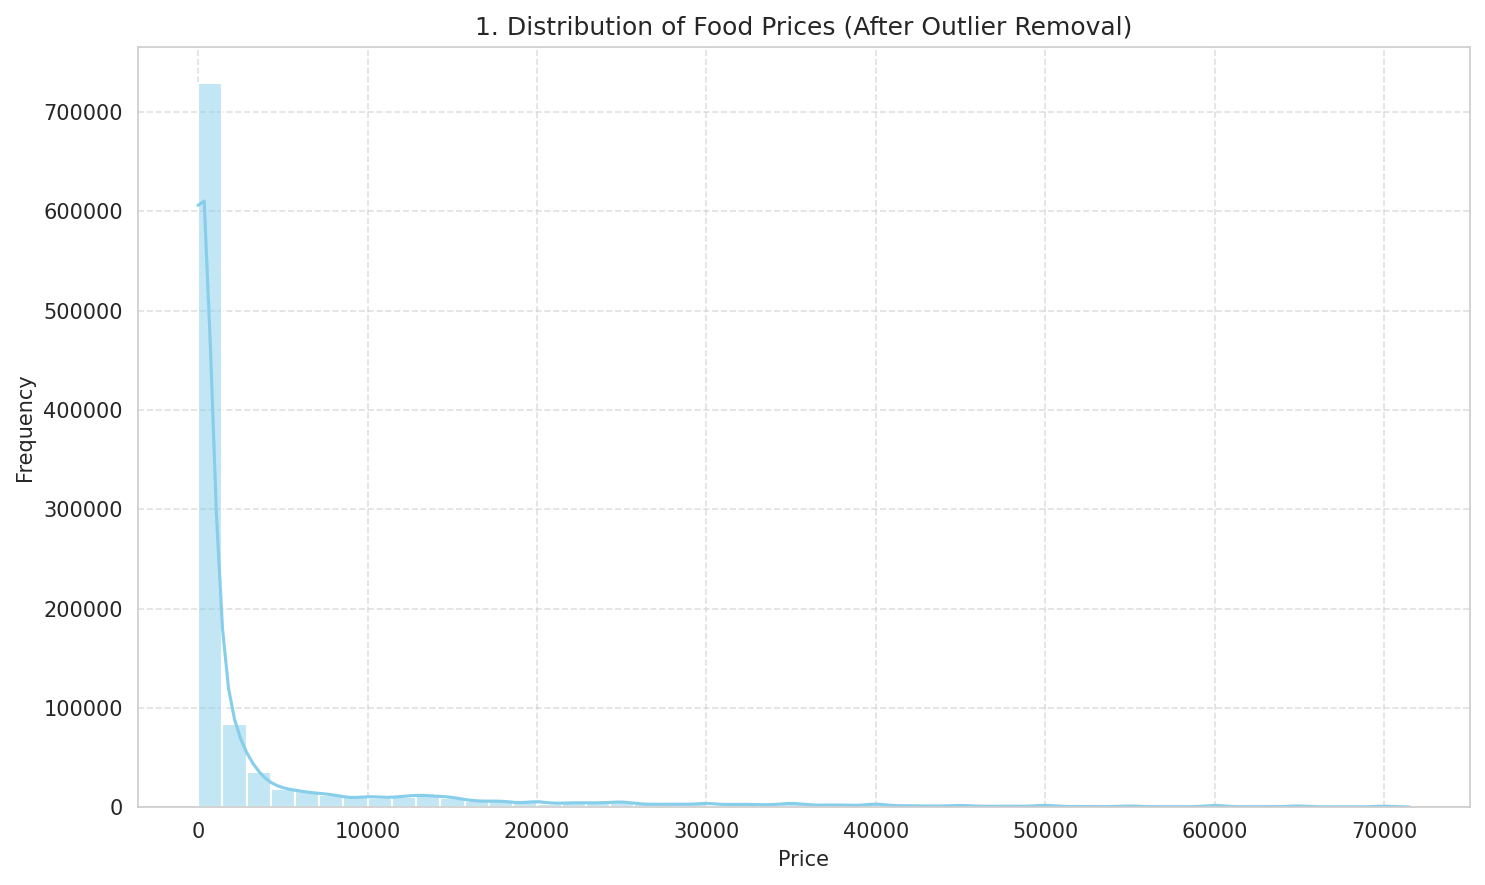

1. Price distribution plot displayed.


/tmp/ipython-input-11-2290989313.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pt_name', y='mp_price', data=df_cleaned_preprocessed, palette='coolwarm')


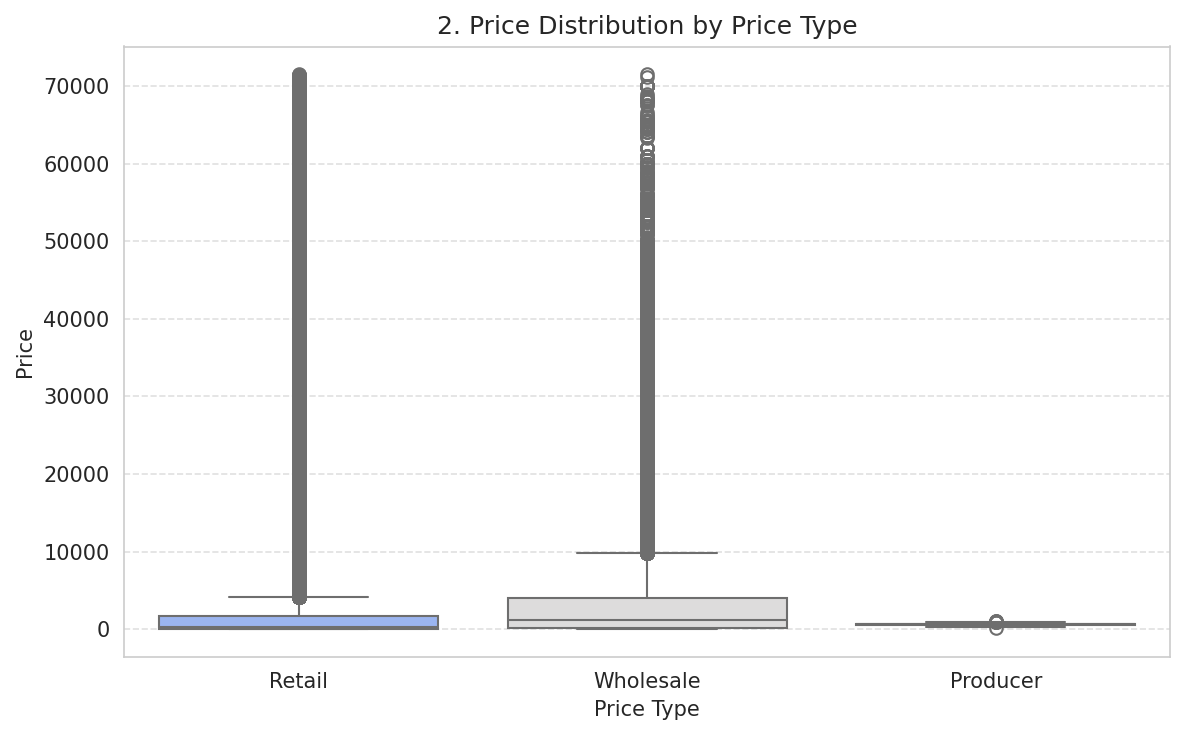

2. Price by type box plot displayed.


/tmp/ipython-input-11-2290989313.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_commodity.index, y=avg_price_by_commodity.values, palette='viridis')


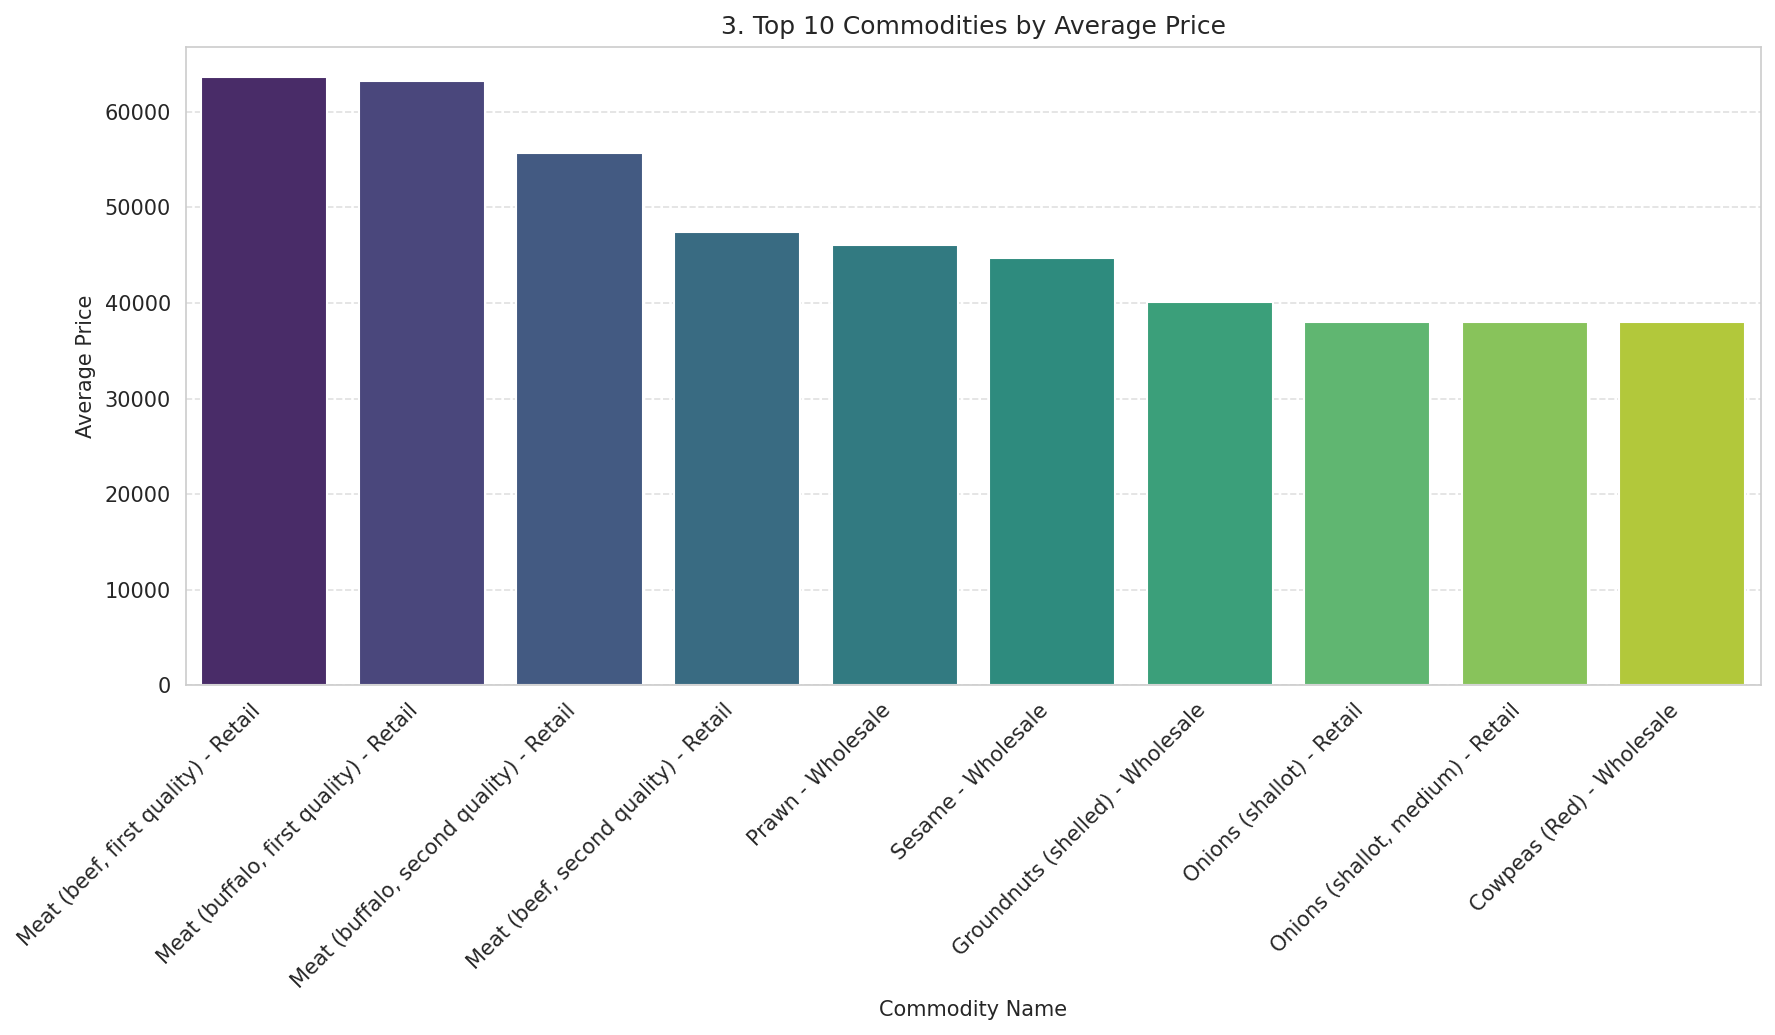

3. Top 10 commodities by average price plot displayed.


/tmp/ipython-input-11-2290989313.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pt_name', data=df_cleaned_preprocessed, palette='pastel', order=df_cleaned_preprocessed['pt_name'].value_counts().index)


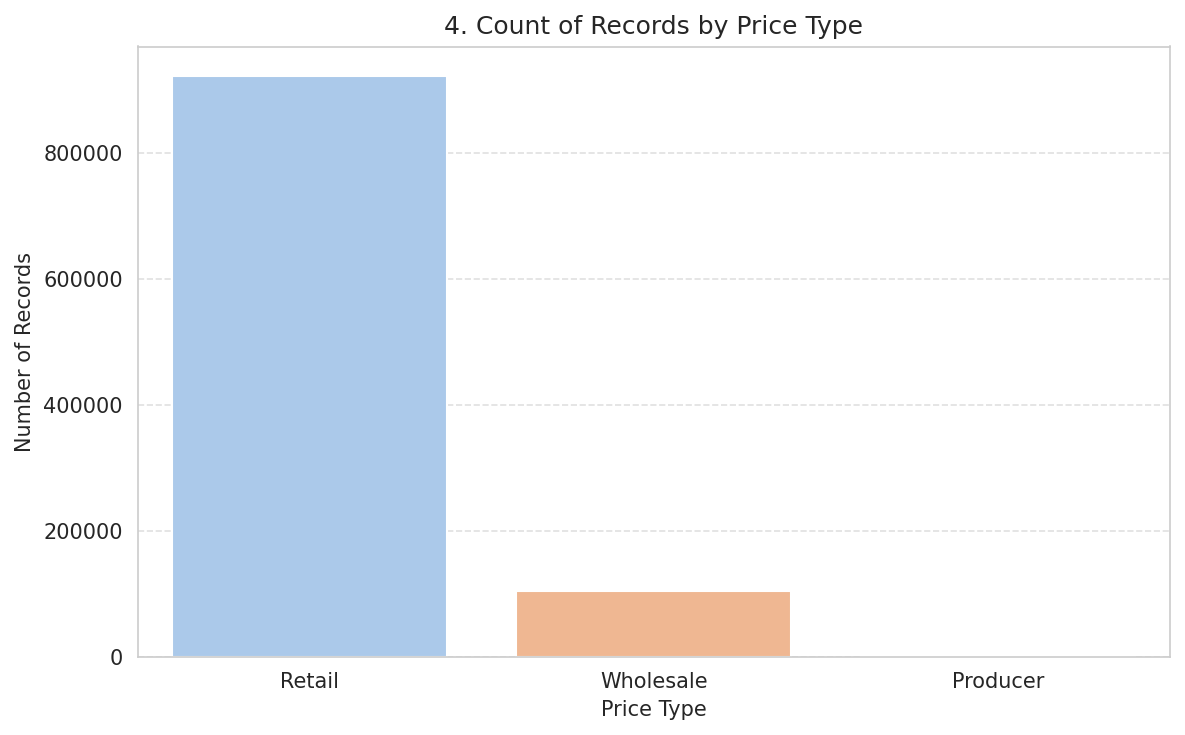

4. Price type count plot displayed.


/tmp/ipython-input-11-2290989313.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cur_name', data=df_cleaned_preprocessed, palette='deep', order=df_cleaned_preprocessed['cur_name'].value_counts().head(10).index)


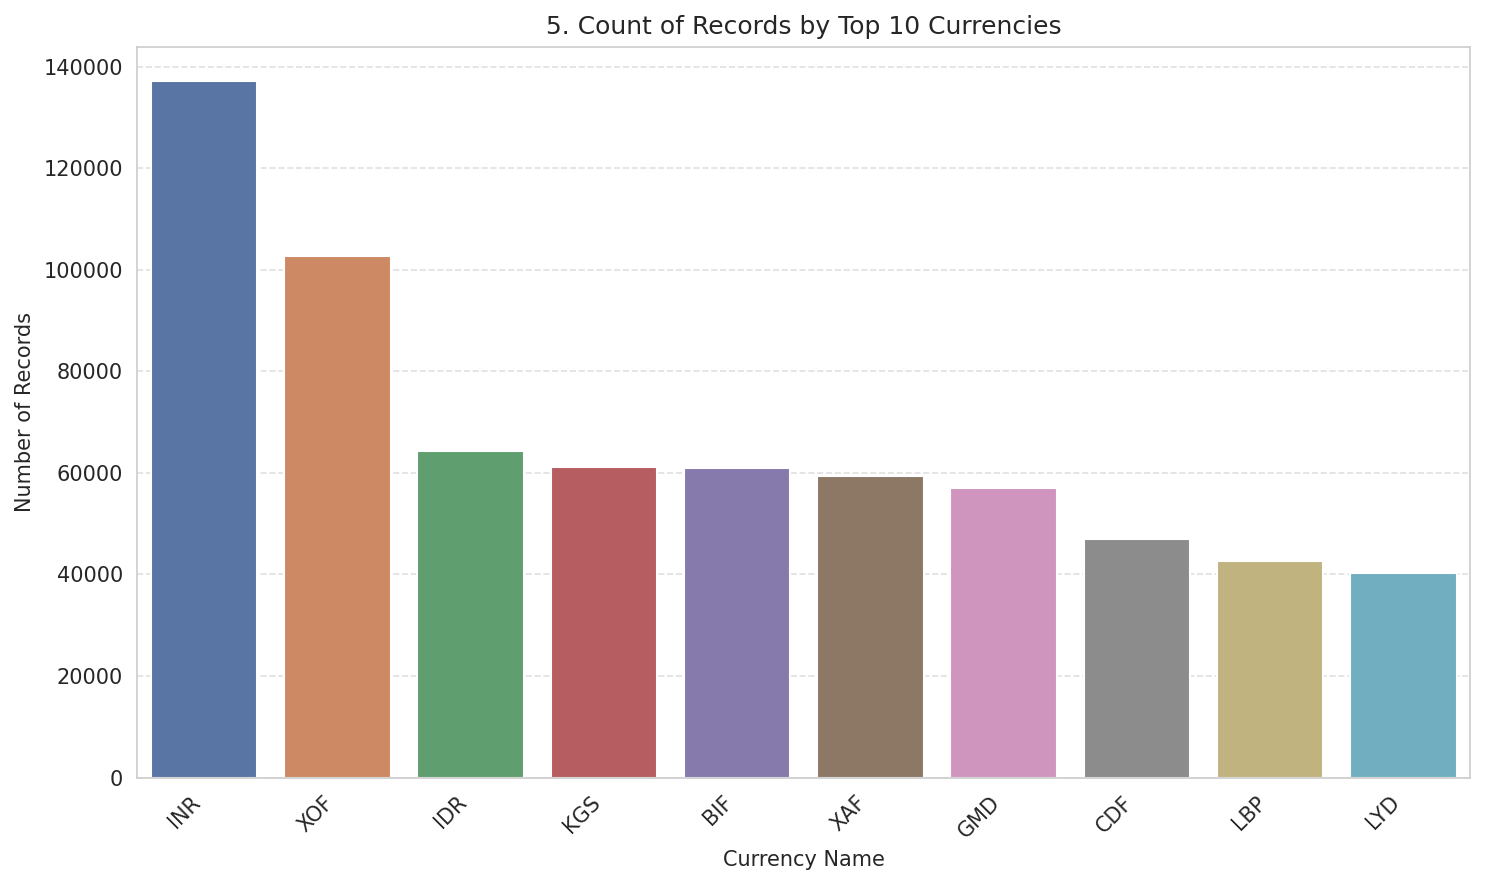

5. Top 10 currencies count plot displayed.


/tmp/ipython-input-11-2290989313.py:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_price = df_cleaned_preprocessed.groupby('mp_date')['mp_price'].mean().resample('M').mean()


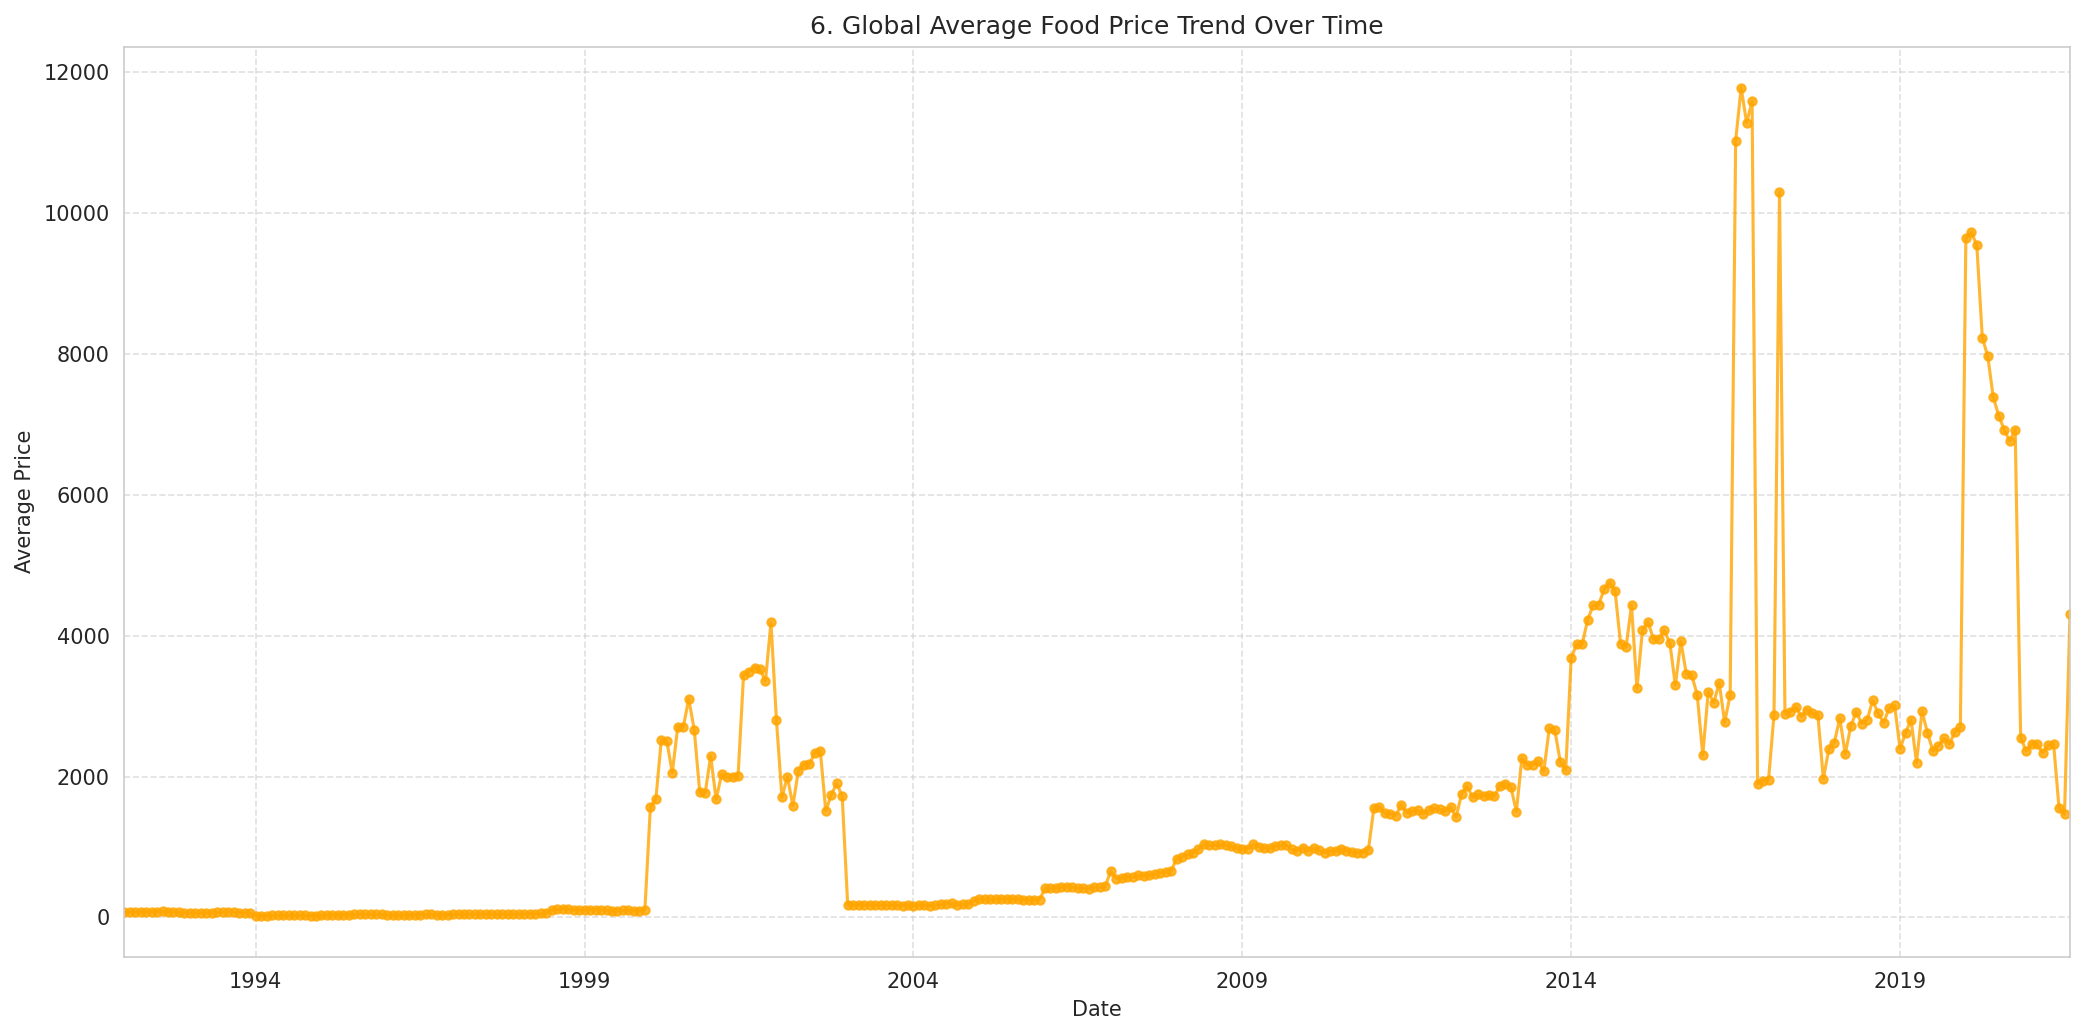

6. Global average price trend plot displayed.


/tmp/ipython-input-11-2290989313.py:94: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commodity_ts = df_cleaned_preprocessed[df_cleaned_preprocessed['cm_name'] == commodity].groupby('mp_date')['mp_price'].mean().resample('M').mean()


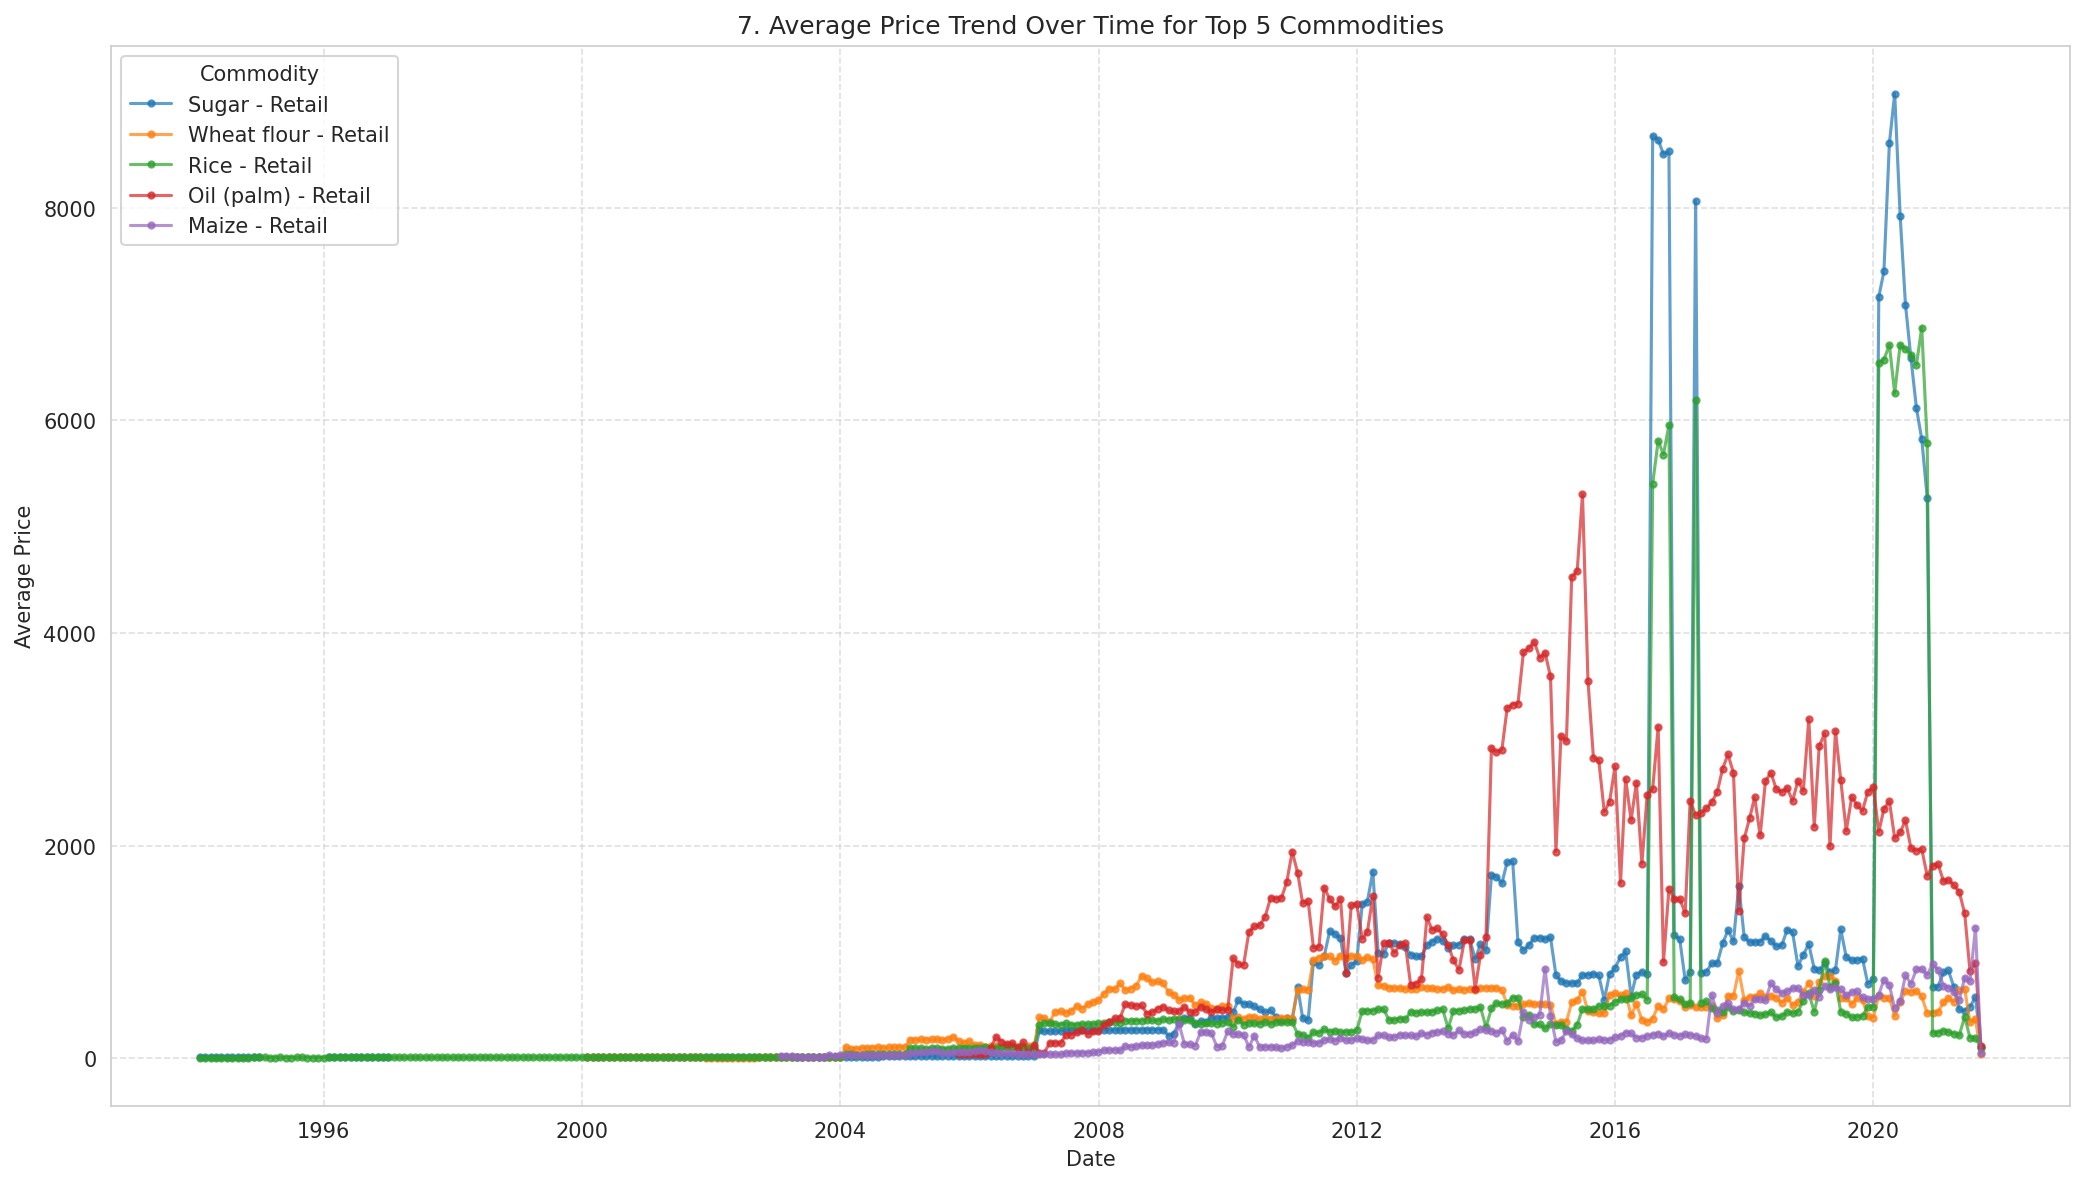

7. Top 5 commodities price trend plot displayed.


/tmp/ipython-input-11-2290989313.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='adm0_name', y='mp_price', data=df_top_countries, palette='tab10')


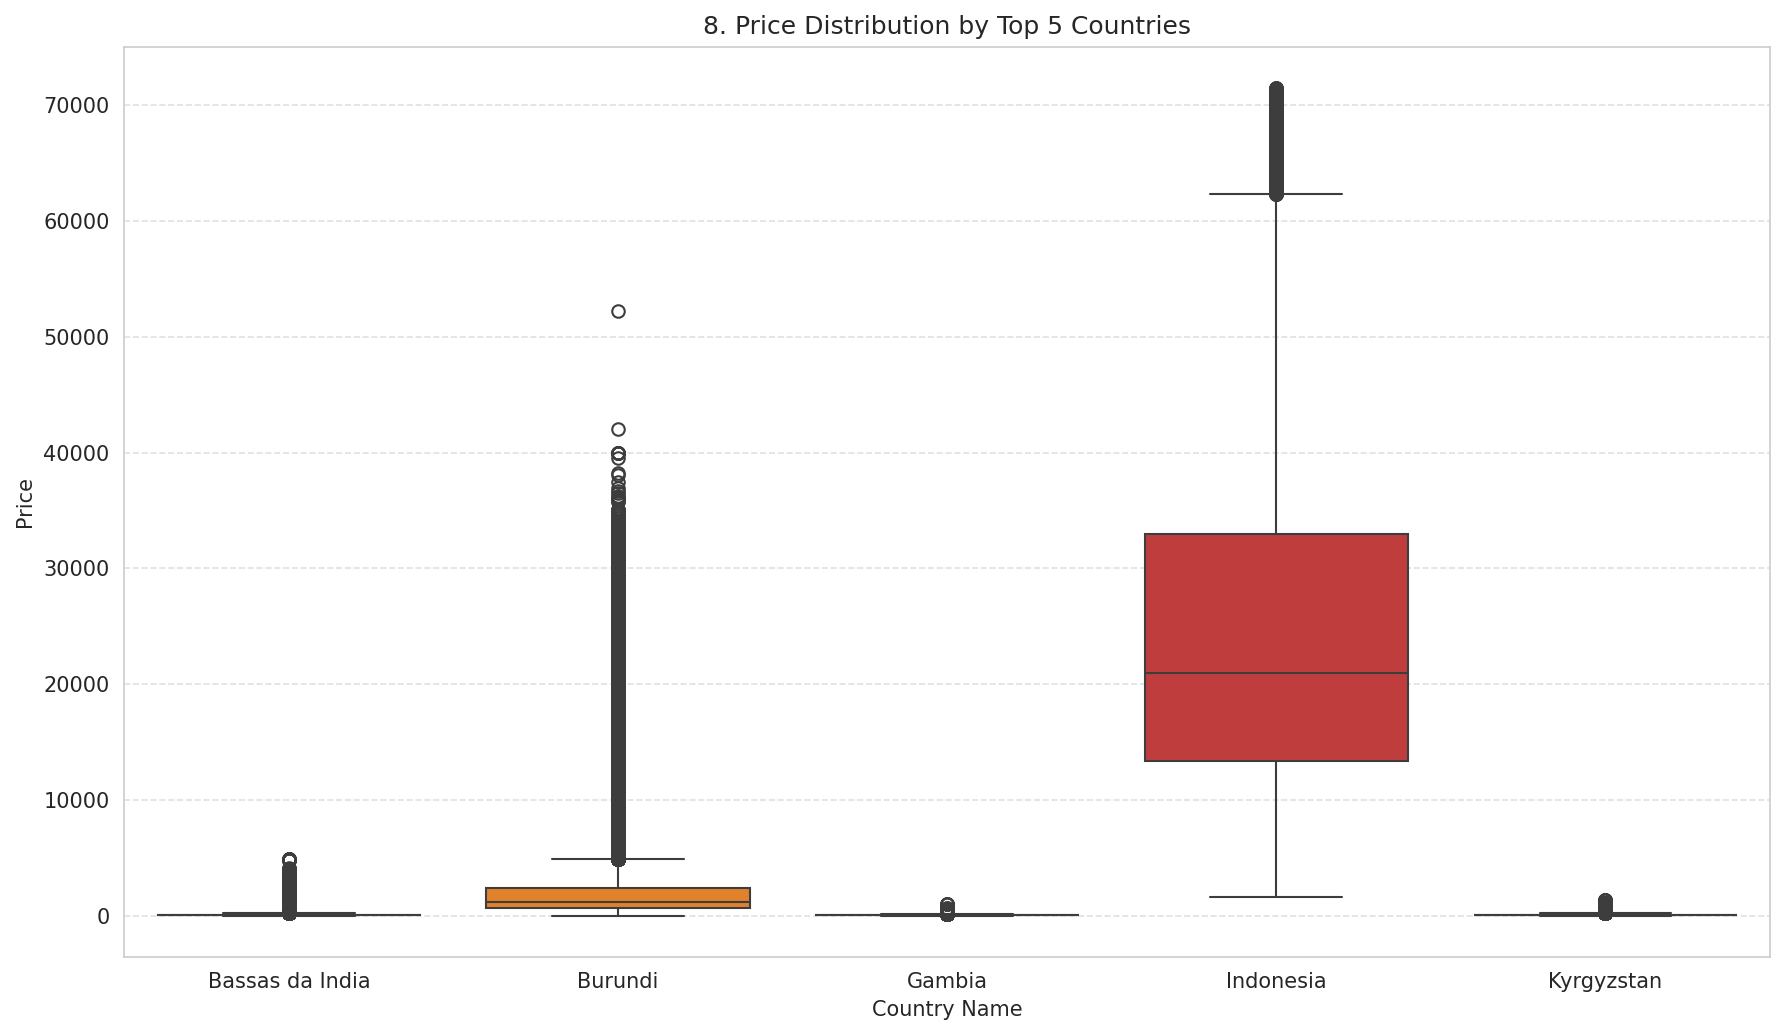

8. Price distribution by top 5 countries plot displayed.


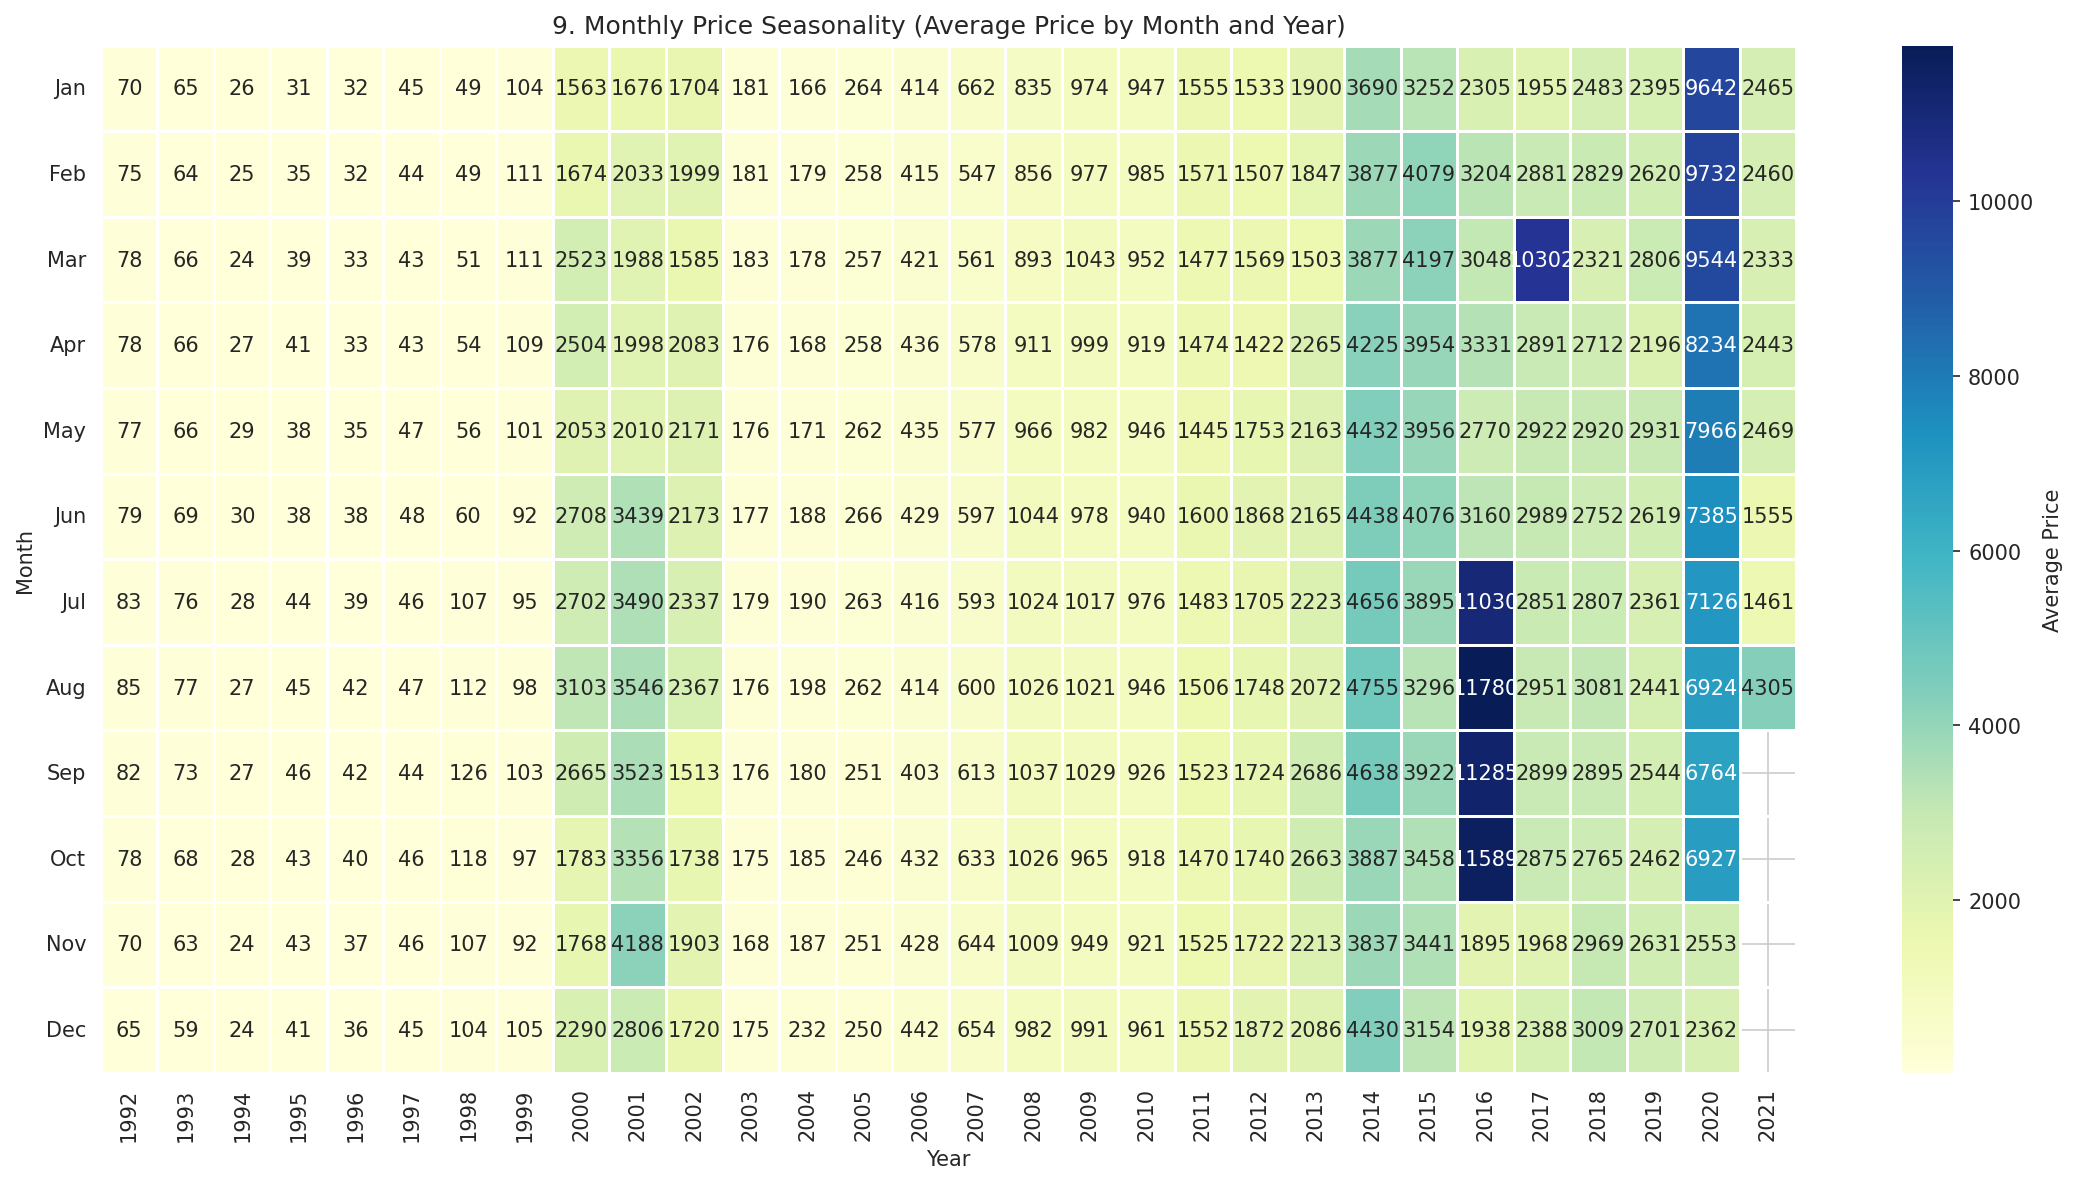

9. Monthly price seasonality heatmap displayed.


/tmp/ipython-input-11-2290989313.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_um.index, y=avg_price_by_um.values, palette='magma')


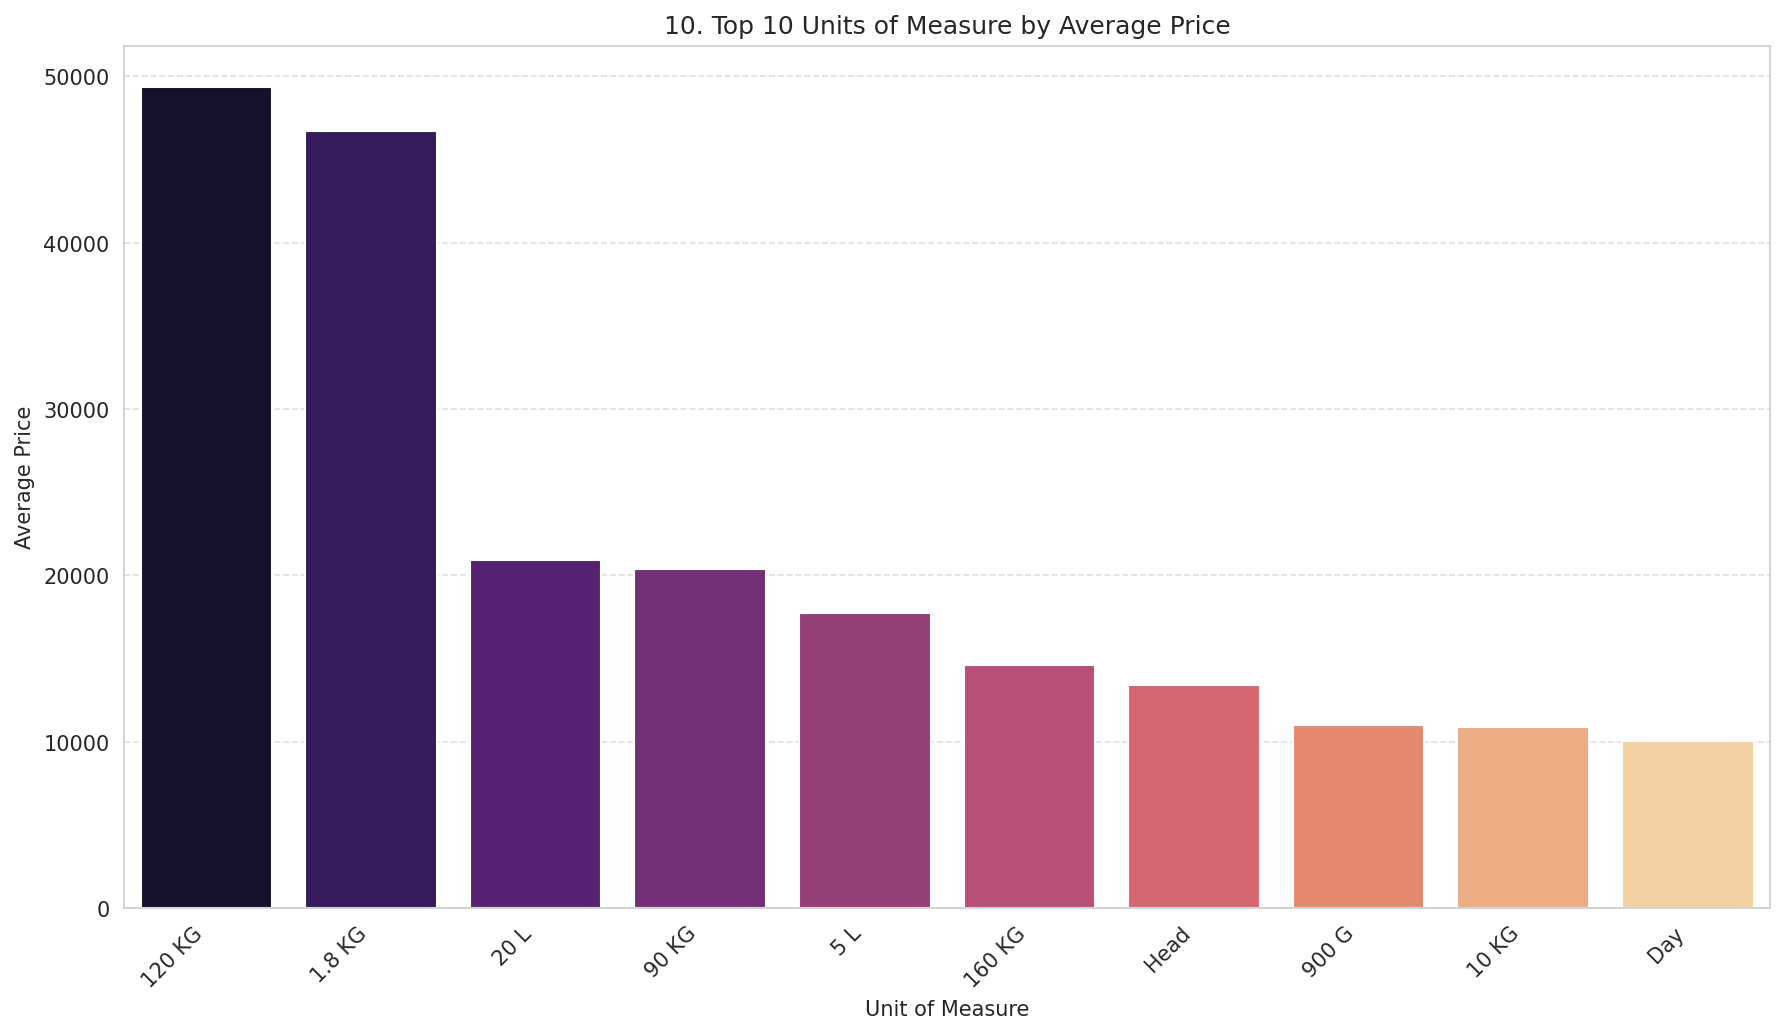

10. Top 10 units of measure by average price plot displayed.

All visualizations have been generated and displayed in your Colab notebook cells.


In [11]:
# Ensure we're working on the final cleaned and preprocessed data
# If running this cell independently, ensure df_cleaned_preprocessed is loaded:
# try:
#     df_cleaned_preprocessed = pd.read_csv('wfpvam_foodprices_cleaned_preprocessed.csv')
#     # Ensure 'mp_date' is datetime if loaded separately
#     df_cleaned_preprocessed['mp_date'] = pd.to_datetime(df_cleaned_preprocessed['mp_date'])
#     print("Cleaned data reloaded for visualization.")
# except Exception as e:
#     print(f"Could not load cleaned data for visualizations: {e}")
#     exit()

print("--- Generating All Visualizations for Notebook Display ---")

# Set a consistent aesthetic style for Seaborn plots.
sns.set_style("whitegrid")
# plt.rcParams['figure.dpi'] = 150 # Removed for direct display, as Colab handles display resolution

# --- 1. Distribution of Food Prices (Histogram) ---
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_preprocessed['mp_price'], bins=50, kde=True, color='skyblue')
plt.title('1. Distribution of Food Prices (After Outlier Removal)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("1. Price distribution plot displayed.")

# --- 2. Box Plot of Food Prices by Price Type ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='pt_name', y='mp_price', data=df_cleaned_preprocessed, palette='coolwarm')
plt.title('2. Price Distribution by Price Type')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("2. Price by type box plot displayed.")

# --- 3. Top 10 Commodities by Average Price (Bar Plot) ---
plt.figure(figsize=(12, 7))
avg_price_by_commodity = df_cleaned_preprocessed.groupby('cm_name')['mp_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_by_commodity.index, y=avg_price_by_commodity.values, palette='viridis')
plt.title('3. Top 10 Commodities by Average Price')
plt.xlabel('Commodity Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("3. Top 10 commodities by average price plot displayed.")

# --- 4. Count Plot of Price Types ---
plt.figure(figsize=(8, 5))
sns.countplot(x='pt_name', data=df_cleaned_preprocessed, palette='pastel', order=df_cleaned_preprocessed['pt_name'].value_counts().index)
plt.title('4. Count of Records by Price Type')
plt.xlabel('Price Type')
plt.ylabel('Number of Records')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("4. Price type count plot displayed.")

# --- 5. Count Plot of Top 10 Currencies ---
plt.figure(figsize=(10, 6))
sns.countplot(x='cur_name', data=df_cleaned_preprocessed, palette='deep', order=df_cleaned_preprocessed['cur_name'].value_counts().head(10).index)
plt.title('5. Count of Records by Top 10 Currencies')
plt.xlabel('Currency Name')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("5. Top 10 currencies count plot displayed.")

# --- 6. Global Average Food Price Trend Over Time (Line Plot) ---
monthly_avg_price = df_cleaned_preprocessed.groupby('mp_date')['mp_price'].mean().resample('M').mean()

plt.figure(figsize=(14, 7))
monthly_avg_price.plot(kind='line', marker='o', linestyle='-', markersize=4, color='orange', alpha=0.8)
plt.title('6. Global Average Food Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("6. Global average price trend plot displayed.")

# --- 7. Average Price Trend for Top 5 Commodities (Multiple Lines) ---
top_5_commodities = df_cleaned_preprocessed['cm_name'].value_counts().head(5).index.tolist()

plt.figure(figsize=(14, 8))
for commodity in top_5_commodities:
    commodity_ts = df_cleaned_preprocessed[df_cleaned_preprocessed['cm_name'] == commodity].groupby('mp_date')['mp_price'].mean().resample('M').mean()
    plt.plot(commodity_ts.index, commodity_ts.values, marker='o', linestyle='-', markersize=3, label=commodity, alpha=0.7)

plt.title('7. Average Price Trend Over Time for Top 5 Commodities')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Commodity')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("7. Top 5 commodities price trend plot displayed.")

# --- 8. Price Distribution by Top 5 Countries (Box Plot) ---
top_5_countries = df_cleaned_preprocessed['adm0_name'].value_counts().head(5).index.tolist()
df_top_countries = df_cleaned_preprocessed[df_cleaned_preprocessed['adm0_name'].isin(top_5_countries)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='adm0_name', y='mp_price', data=df_top_countries, palette='tab10')
plt.title('8. Price Distribution by Top 5 Countries')
plt.xlabel('Country Name')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("8. Price distribution by top 5 countries plot displayed.")

# --- 9. Monthly Price Seasonality (Heatmap) ---
# Extract month and year for aggregation
df_for_eda['month'] = df_for_eda['mp_date'].dt.month
df_for_eda['year'] = df_for_eda['mp_date'].dt.year

# Create a pivot table for average price by year and month
monthly_avg_pivot = df_for_eda.pivot_table(values='mp_price', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(15, 8))
sns.heatmap(monthly_avg_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('9. Monthly Price Seasonality (Average Price by Month and Year)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=np.arange(12) + 0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("9. Monthly price seasonality heatmap displayed.")

# --- 10. Average Price by Unit of Measure (Bar Plot) ---
plt.figure(figsize=(12, 7))
avg_price_by_um = df_for_eda.groupby('um_name')['mp_price'].mean().sort_values(ascending=False).head(10) # Top 10 by average price
sns.barplot(x=avg_price_by_um.index, y=avg_price_by_um.values, palette='magma')
plt.title('10. Top 10 Units of Measure by Average Price')
plt.xlabel('Unit of Measure')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Display the plot in the notebook
print("10. Top 10 units of measure by average price plot displayed.")

# Final confirmation
print("\nAll visualizations have been generated and displayed in your Colab notebook cells.")

## 💾 Cell 8: Final Save of Cleaned Data

- Saves the cleaned and processed DataFrame to a new CSV file using `to_csv()`.
- This marks the end of the ETL (Extract, Transform, Load) process.
- The saved file can now be used for modeling, visualization, or sharing.


In [12]:
# --- Final Save of Cleaned Data (Part of ETL's "Load" phase) ---
output_cleaned_path = 'wfpvam_foodprices_cleaned_preprocessed.csv'
df_cleaned_preprocessed.to_csv(output_cleaned_path, index=False)
print(f"\nFinal cleaned and preprocessed dataset saved to '{output_cleaned_path}'.")

# Instructions for user
print("\n--- All phases completed! ---")
print("You can now download 'wfpvam_foodprices_cleaned_preprocessed.csv' (your final cleaned dataset)")
print("and 'rice_prices_timeseries.csv' (example EDA output) from your Colab files.")


Final cleaned and preprocessed dataset saved to 'wfpvam_foodprices_cleaned_preprocessed.csv'.

--- All phases completed! ---
You can now download 'wfpvam_foodprices_cleaned_preprocessed.csv' (your final cleaned dataset)
and 'rice_prices_timeseries.csv' (example EDA output) from your Colab files.


## 📉 1. Regression Models (Price Prediction)

Predict `mp_price` using features like commodity, market, and date. Start with **Linear Regression**, then use **Random Forest** or **XGBoost** for better accuracy. For time-based trends, apply models like **ARIMA**, **Prophet**, or **LSTM**.


## 🧮 2. Classification Models (Categorization & Anomaly Detection)

Classify prices into categories (e.g., low/medium/high) using models like **Logistic Regression** or **Random Forest**. For detecting unusual price spikes, use **Isolation Forest** or **One-Class SVM**.


## 📊 3. Clustering Models (Segmentation)

Group similar markets or commodities using clustering. Use **K-Means** for clear groupings based on price trends, or **DBSCAN** to find flexible clusters and outliers.
